
# Import Python libraries.

In [26]:
import numpy as np # linear algebra
import pandas as pd
from bayes_opt import BayesianOptimization
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials, space_eval
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor,XGBClassifier
from lightgbm import LGBMRegressor,LGBMClassifier
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,GridSearchCV,StratifiedKFold
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.metrics import roc_auc_score,mean_absolute_error,mean_squared_error
from mlxtend.classifier import StackingCVClassifier

from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier

from sklearn.model_selection import cross_val_score,KFold,RepeatedStratifiedKFold,StratifiedKFold

import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTEENN

import os

# Import Datasets

In [27]:
train_data = pd.read_csv(r"train.csv")
test_data = pd.read_csv(r"test.csv")

# Check how train dataset looks like.

In [28]:
train_data.head()

,Id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1,1303835,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [29]:
train_data.shape

(252000, 13)

In [36]:
train_data=train_data.drop('Id',axis=1)

In [37]:
train_data

,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1303835,23,3,0,0,0,0,0,0,3,13,0
1,7574516,40,10,0,0,0,1,1,1,9,13,0
2,3991815,66,4,1,0,0,2,2,2,4,10,0
3,6256451,41,2,0,0,1,1,3,3,2,12,1
4,5768871,47,11,0,0,0,3,4,4,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,0,0,0,46,220,10,6,11,0
251996,2843572,26,10,0,0,0,45,0,0,6,11,0
251997,4522448,46,7,0,0,0,16,106,1,7,12,0
251998,6507128,45,0,0,0,0,22,27,12,0,10,0


In [30]:
test_data.head()


,id,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years
0,1,7393090,59,19,single,rented,no,Geologist,Malda,West Bengal,4,13
1,2,1215004,25,5,single,rented,no,Firefighter,Jalna,Maharashtra,5,10
2,3,8901342,50,12,single,rented,no,Lawyer,Thane,Maharashtra,9,14
3,4,1944421,49,9,married,rented,yes,Analyst,Latur,Maharashtra,3,12
4,5,13429,25,18,single,rented,yes,Comedian,Berhampore,West Bengal,13,11


In [18]:
test_data.shape

(28000, 11)

In [38]:
test_indexes=test_data['id']
test_data=test_data.drop('id',axis=1)

# Convert datatype of selected fields.

In [39]:
train_data["profession"]=pd.factorize(train_data.profession)[0]
train_data["city"]=pd.factorize(train_data.city)[0]
train_data["state"]=pd.factorize(train_data.state)[0]
train_data["married"]=pd.factorize(train_data.married)[0]
train_data["house_ownership"]=pd.factorize(train_data.house_ownership)[0]
train_data["car_ownership"]=pd.factorize(train_data.car_ownership)[0]

In [40]:
test_data["profession"]=pd.factorize(test_data.profession)[0]
test_data["city"]=pd.factorize(test_data.city)[0]
test_data["state"]=pd.factorize(test_data.state)[0]
test_data["married"]=pd.factorize(test_data.married)[0]
test_data["house_ownership"]=pd.factorize(test_data.house_ownership)[0]
test_data["car_ownership"]=pd.factorize(test_data.car_ownership)[0]


<AxesSubplot:title={'center':'analysis'}>

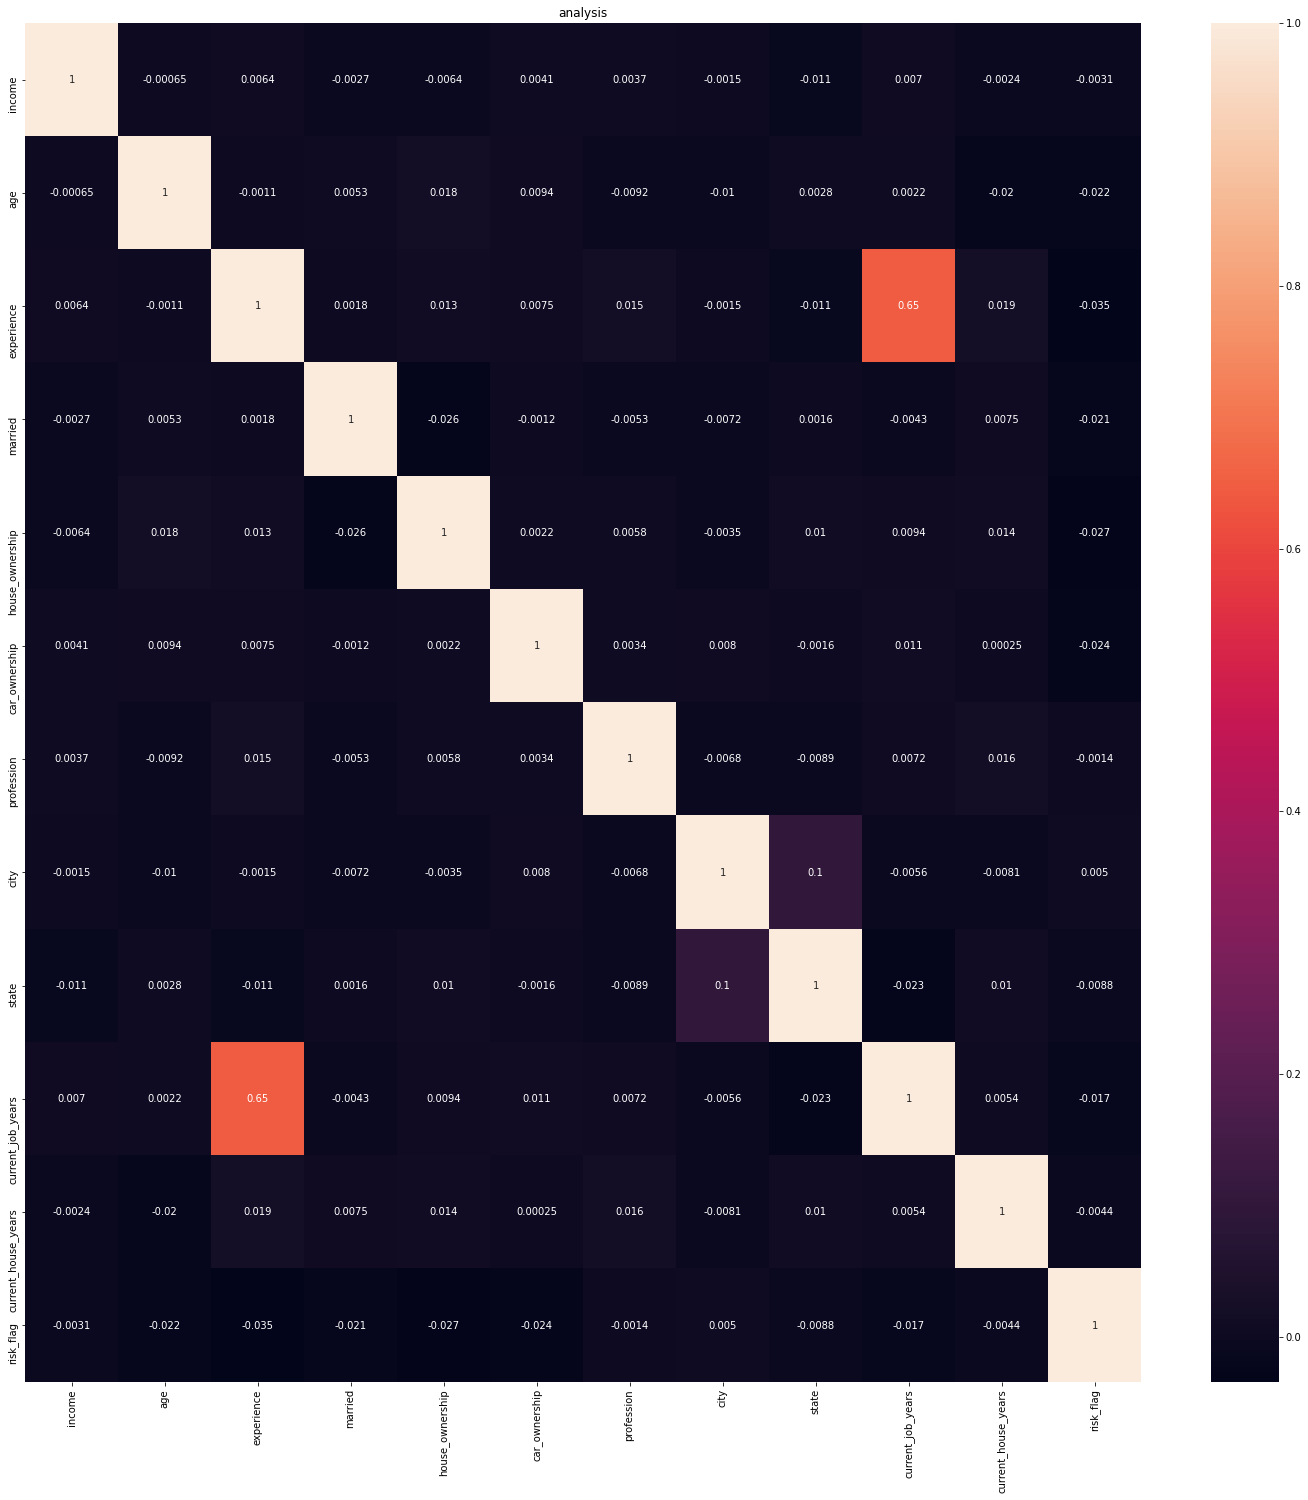

In [41]:
plt.figure(figsize=(25,25))

# Add title
plt.title("analysis")

sns.heatmap(train_data.corr(),  annot=True)

<AxesSubplot:title={'center':'analysis'}>

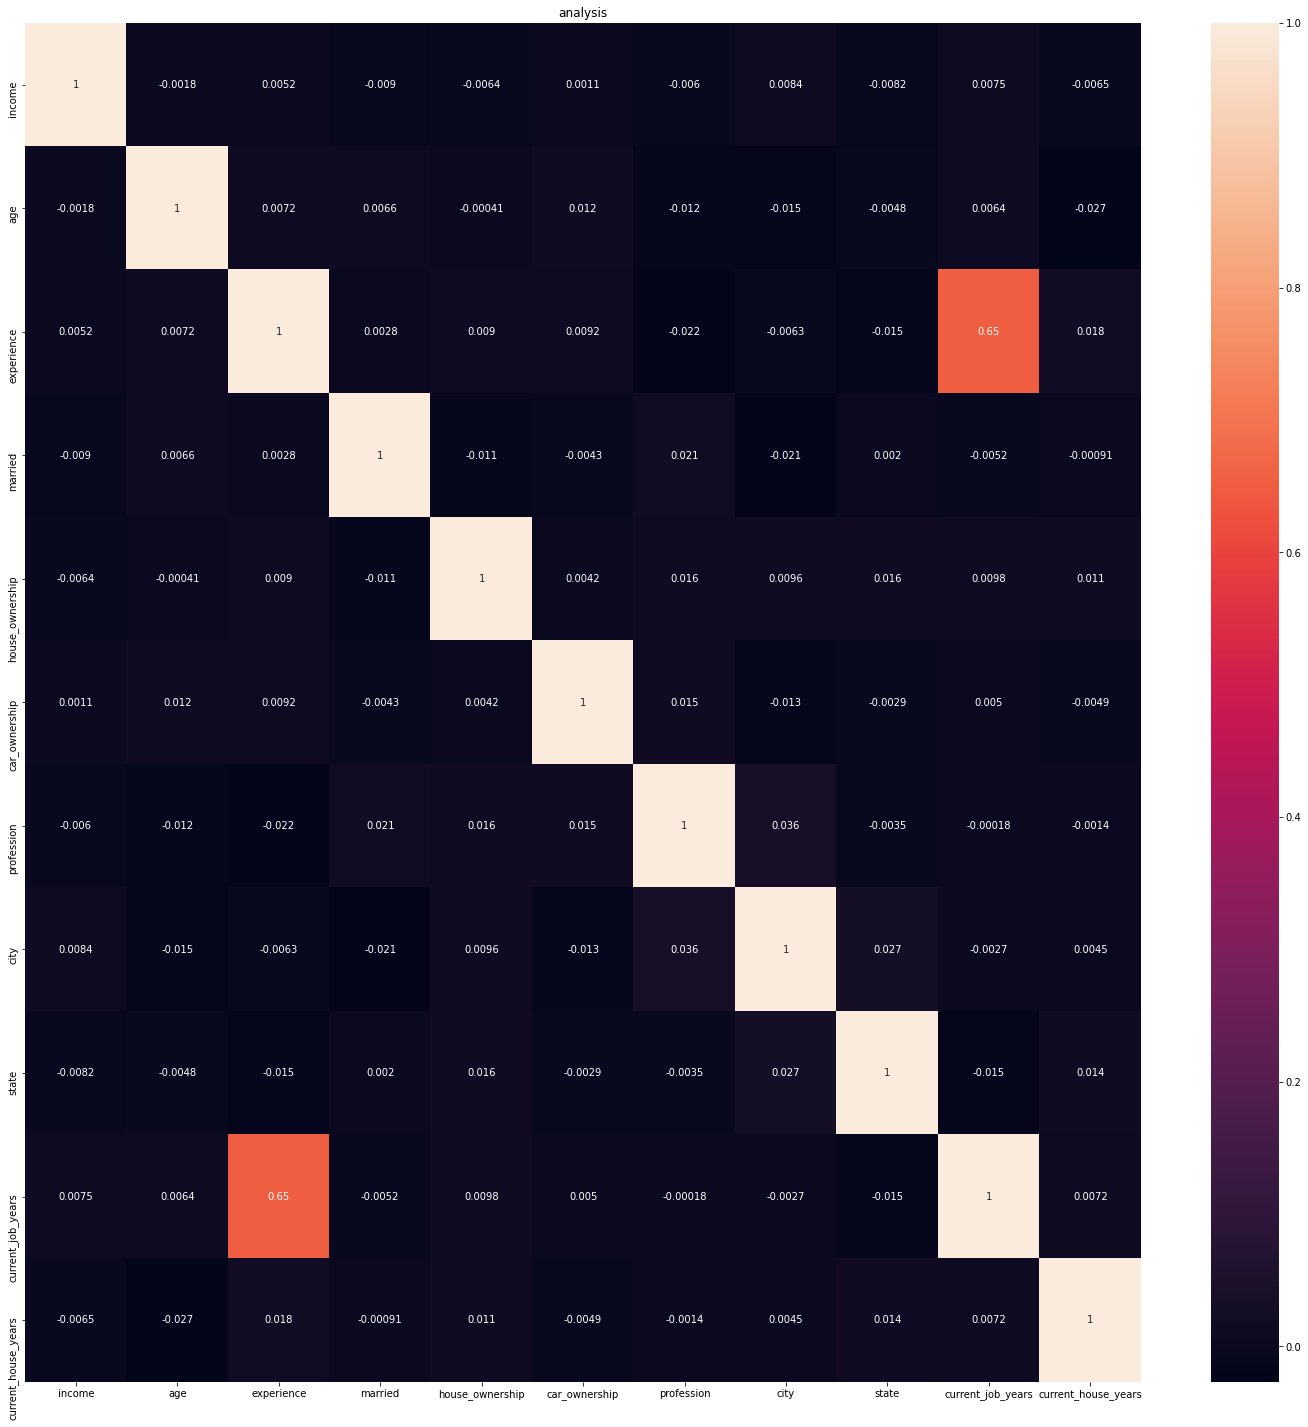

In [42]:
plt.figure(figsize=(25,25))

# Add title
plt.title("analysis")

sns.heatmap(test_data.corr(),  annot=True)

In [44]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   income               252000 non-null  int64
 1   age                  252000 non-null  int64
 2   experience           252000 non-null  int64
 3   married              252000 non-null  int64
 4   house_ownership      252000 non-null  int64
 5   car_ownership        252000 non-null  int64
 6   profession           252000 non-null  int64
 7   city                 252000 non-null  int64
 8   state                252000 non-null  int64
 9   current_job_years    252000 non-null  int64
 10  current_house_years  252000 non-null  int64
 11  risk_flag            252000 non-null  int64
dtypes: int64(12)
memory usage: 23.1 MB


/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


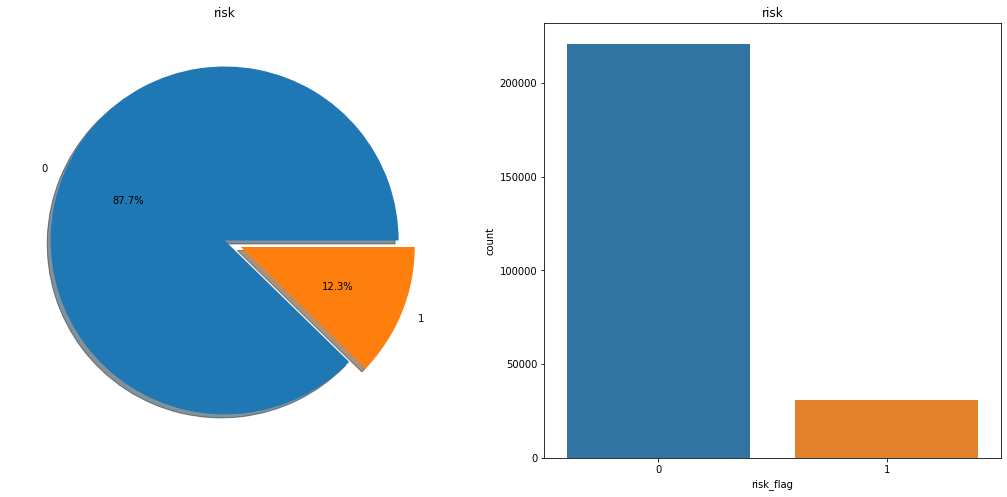

In [47]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train_data['risk_flag'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('risk')
ax[0].set_ylabel('')
sns.countplot('risk_flag',data=train_data,ax=ax[1])
ax[1].set_title('risk')
plt.show()

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


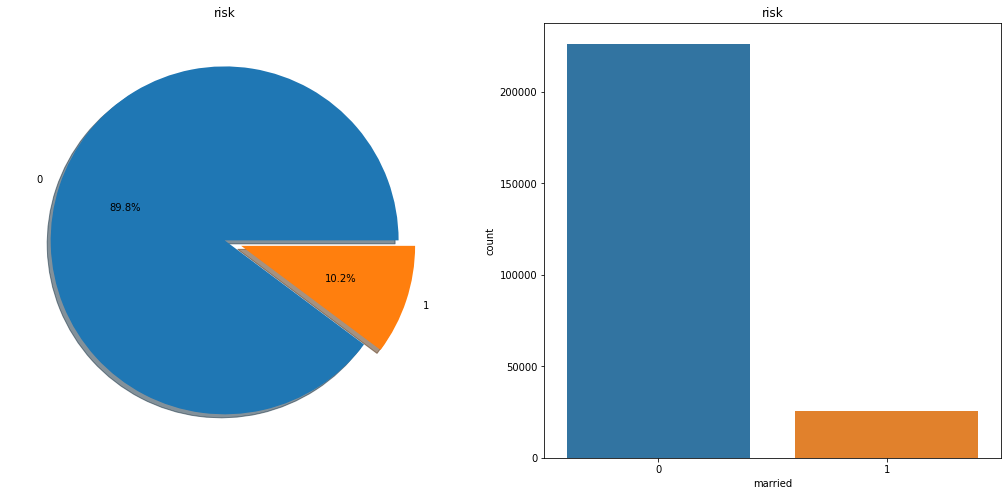

In [48]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train_data['married'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('risk')
ax[0].set_ylabel('')
sns.countplot('married',data=train_data,ax=ax[1])
ax[1].set_title('risk')
plt.show()

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


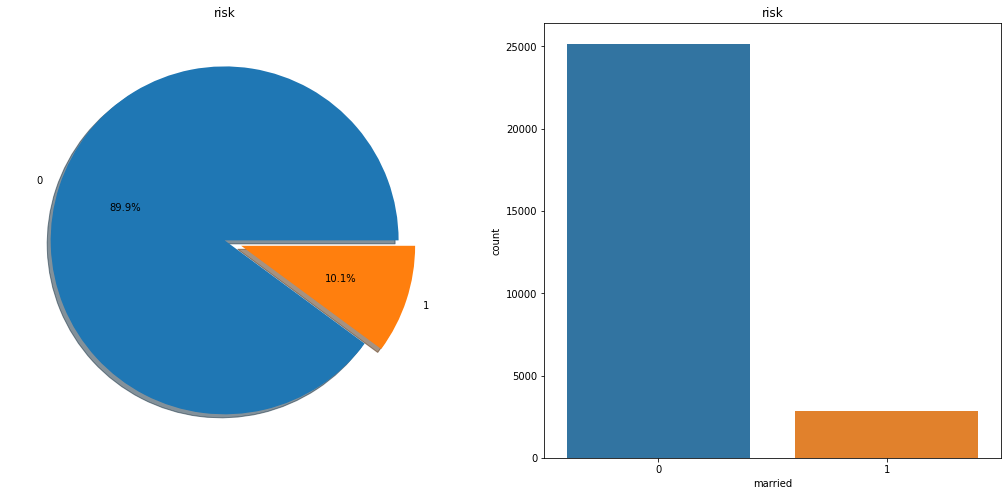

In [50]:
f,ax=plt.subplots(1,2,figsize=(18,8))
test_data['married'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('risk')
ax[0].set_ylabel('')
sns.countplot('married',data=test_data,ax=ax[1])
ax[1].set_title('risk')
plt.show()

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


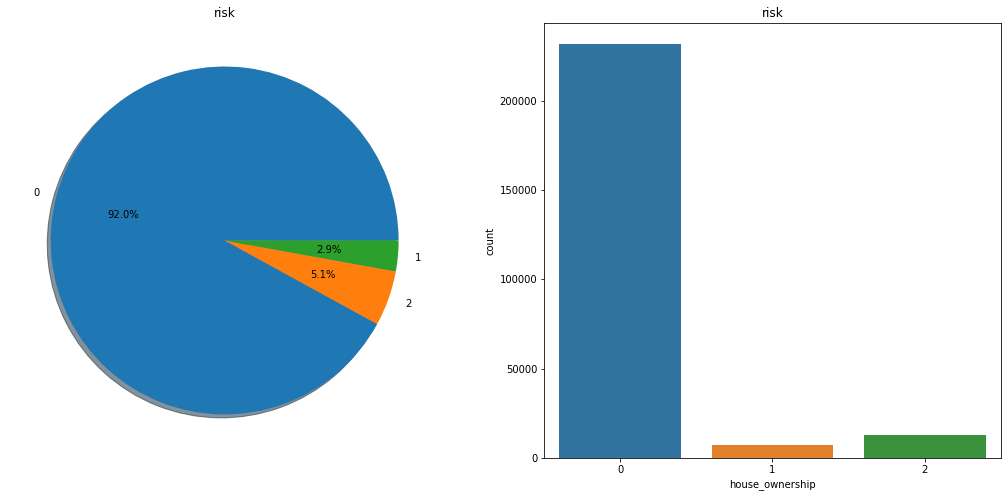

In [52]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train_data['house_ownership'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('risk')
ax[0].set_ylabel('')
sns.countplot('house_ownership',data=train_data,ax=ax[1])
ax[1].set_title('risk')
plt.show()

/home/jaidev/anaconda3/envs/my_env/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


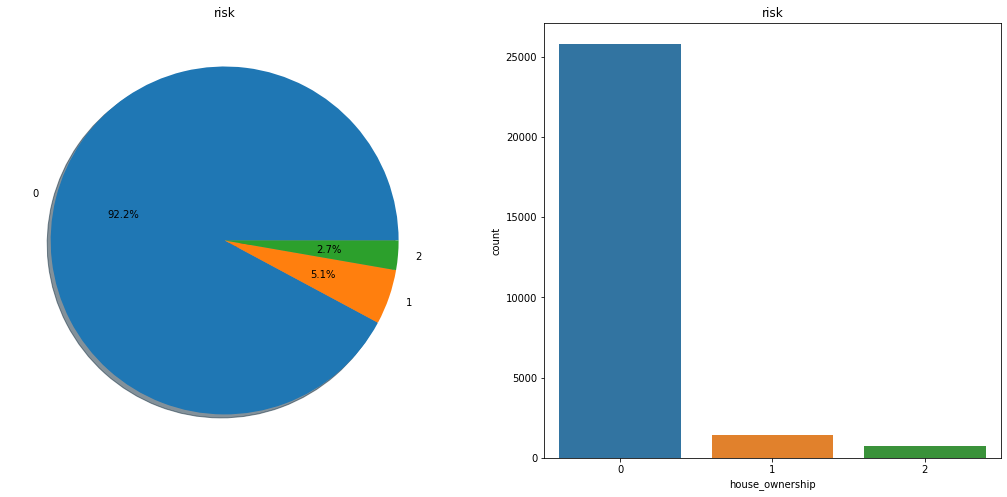

In [53]:
f,ax=plt.subplots(1,2,figsize=(18,8))
test_data['house_ownership'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('risk')
ax[0].set_ylabel('')
sns.countplot('house_ownership',data=test_data,ax=ax[1])
ax[1].set_title('risk')
plt.show()

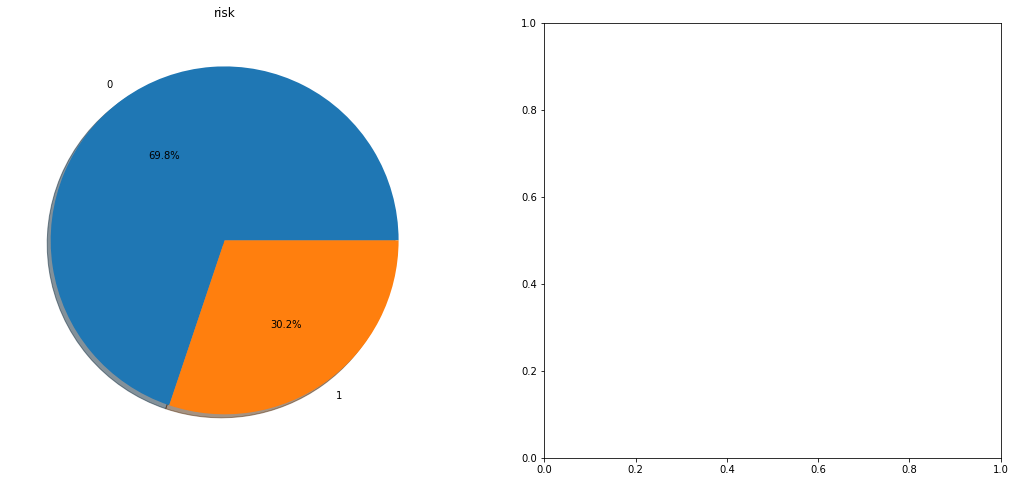

In [54]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train_data['car_ownership'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('risk')
ax[0].set_ylabel('')
# sns.countplot('car_ownership',data=train_data,ax=ax[1])
# ax[1].set_title('risk')
plt.show()

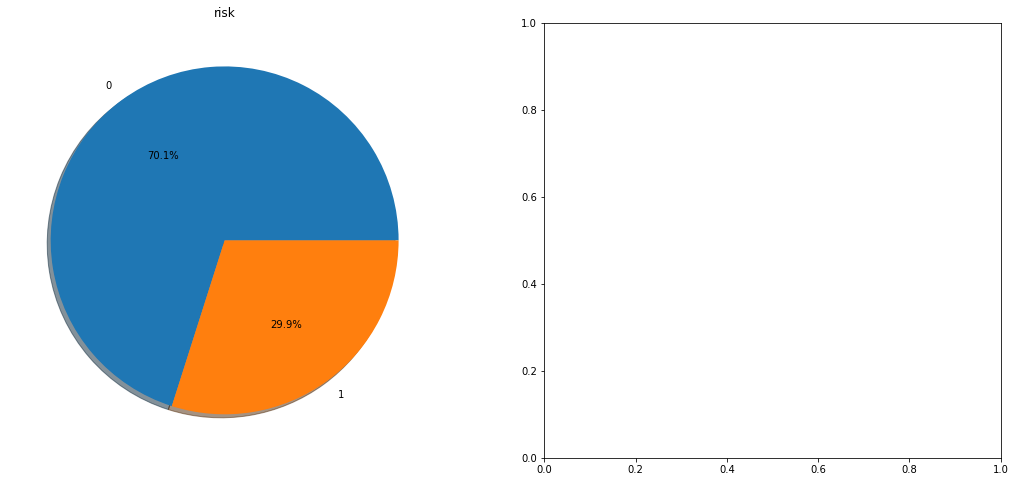

In [55]:
f,ax=plt.subplots(1,2,figsize=(18,8))
test_data['car_ownership'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('risk')
ax[0].set_ylabel('')
# sns.countplot('car_ownership',data=train_data,ax=ax[1])
# ax[1].set_title('risk')
plt.show()

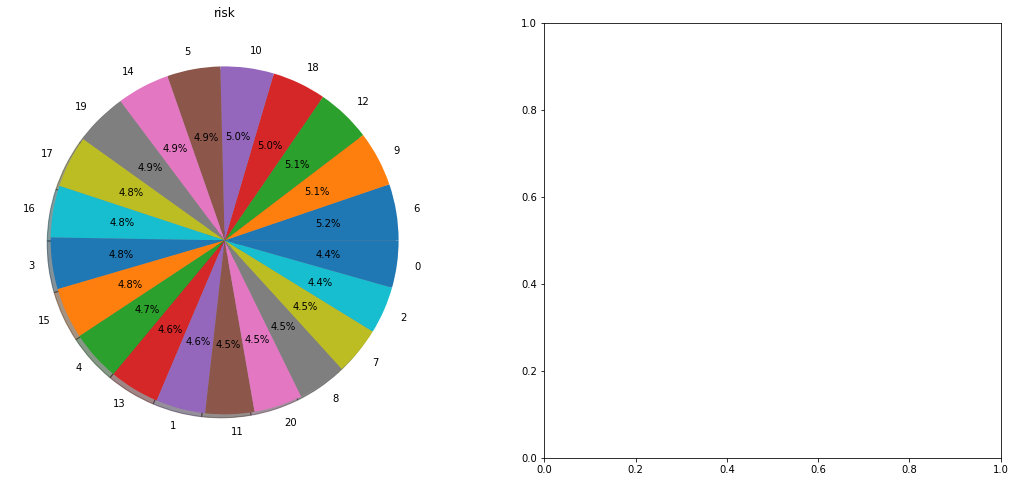

In [57]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train_data['experience'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('risk')
ax[0].set_ylabel('')
# sns.countplot('car_ownership',data=train_data,ax=ax[1])
# ax[1].set_title('risk')
plt.show()

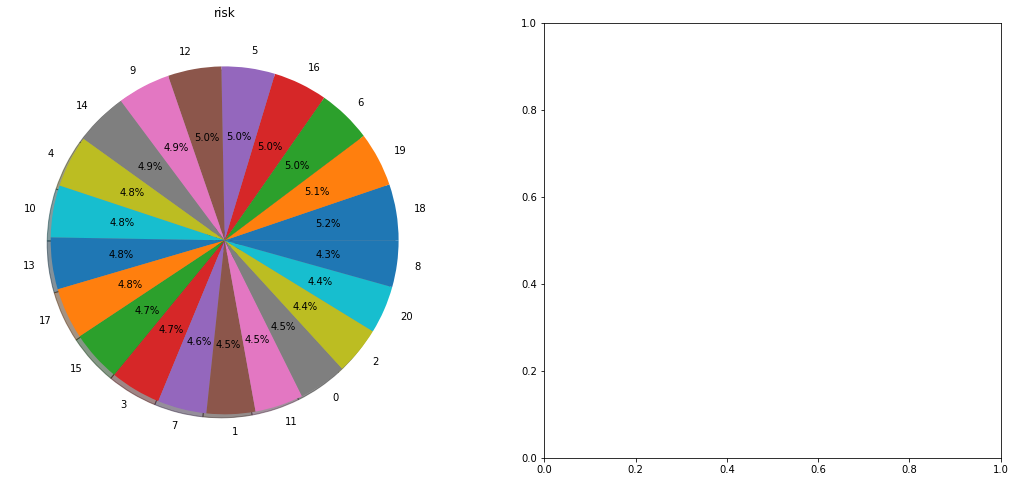

In [58]:
f,ax=plt.subplots(1,2,figsize=(18,8))
test_data['experience'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('risk')
ax[0].set_ylabel('')
# sns.countplot('car_ownership',data=train_data,ax=ax[1])
# ax[1].set_title('risk')
plt.show()

<AxesSubplot:ylabel='Frequency'>

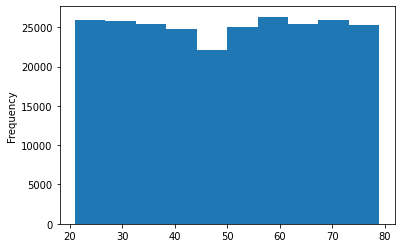

In [59]:
train_data['age'].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

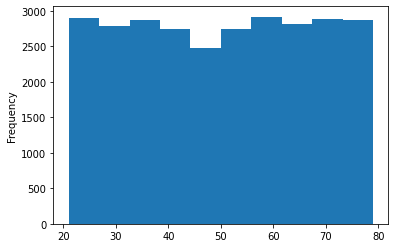

In [60]:
test_data['age'].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

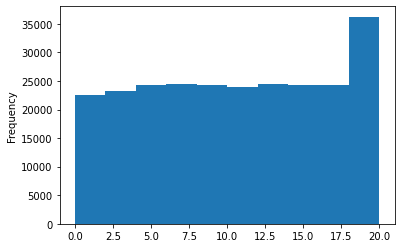

In [61]:
train_data['experience'].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

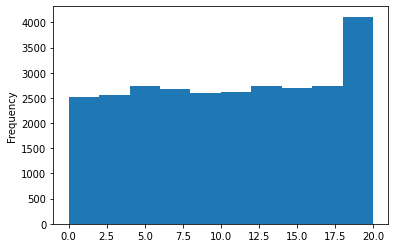

In [78]:
test_data['experience'].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

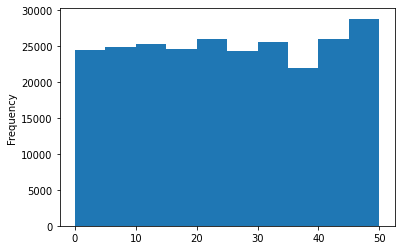

In [65]:
train_data['profession'].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

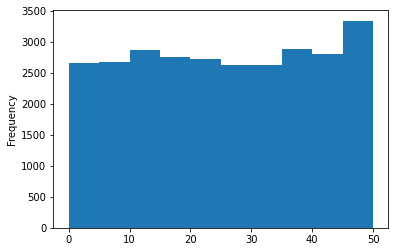

In [66]:
test_data['profession'].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

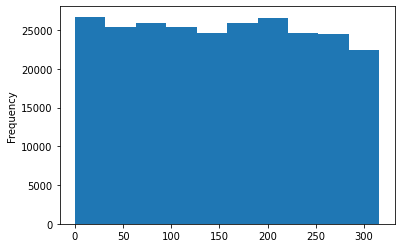

In [67]:
train_data['city'].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

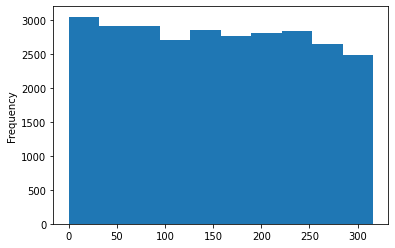

In [68]:
test_data['city'].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

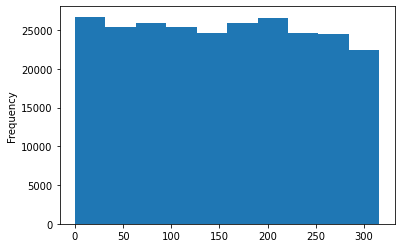

In [72]:
train_data['city'].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

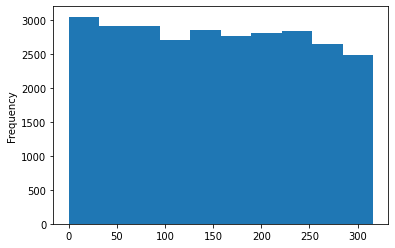

In [70]:
test_data['city'].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

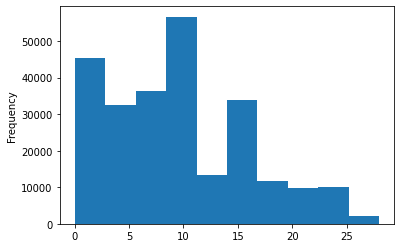

In [71]:
train_data['state'].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

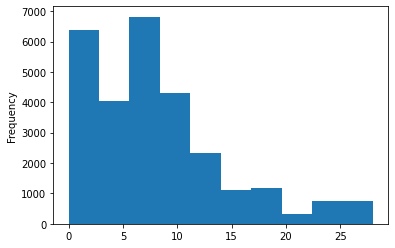

In [73]:
test_data['state'].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

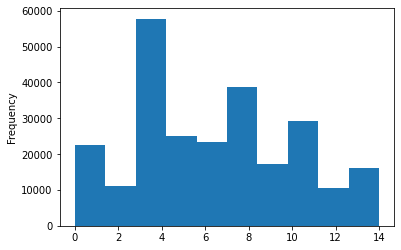

In [74]:
train_data['current_job_years'].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

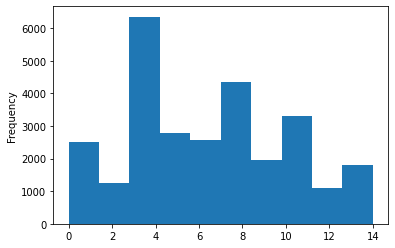

In [75]:
test_data['current_job_years'].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

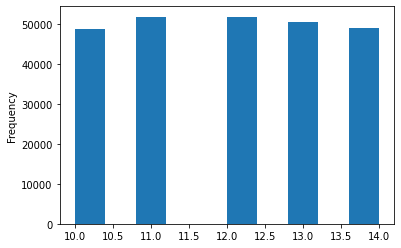

In [76]:
train_data['current_house_years'].plot(kind="hist")

<AxesSubplot:ylabel='Frequency'>

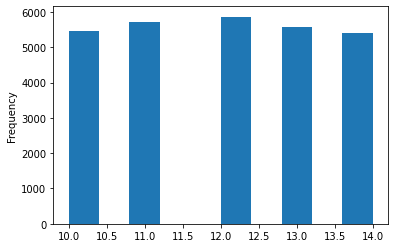

In [77]:
test_data['current_house_years'].plot(kind="hist")

In [56]:
train_data

,income,age,experience,married,house_ownership,car_ownership,profession,city,state,current_job_years,current_house_years,risk_flag
0,1303835,23,3,0,0,0,0,0,0,3,13,0
1,7574516,40,10,0,0,0,1,1,1,9,13,0
2,3991815,66,4,1,0,0,2,2,2,4,10,0
3,6256451,41,2,0,0,1,1,3,3,2,12,1
4,5768871,47,11,0,0,0,3,4,4,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...
251995,8154883,43,13,0,0,0,46,220,10,6,11,0
251996,2843572,26,10,0,0,0,45,0,0,6,11,0
251997,4522448,46,7,0,0,0,16,106,1,7,12,0
251998,6507128,45,0,0,0,0,22,27,12,0,10,0


# Drop the dependent variable from the train dataset. 

In [9]:
xtrain=train_data.drop("risk_flag",axis=1)
ytrain=train_data["risk_flag"]

# Train your model

In [21]:
from sklearn.tree import DecisionTreeClassifier
DTClassifier= DecisionTreeClassifier(criterion='entropy', random_state=41)
DTClassifier.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', random_state=41)

# Predict on test_data set

In [22]:
y_pred= DTClassifier.predict(test_data)

In [23]:
y_pred


array([0, 0, 0, ..., 0, 0, 0])

In [24]:
result = pd.DataFrame()
test_data=test_data.rename(columns={'id':'Id'})
# make a prediction on a new row of data

result['id'] = test_data['Id']

result['risk_flag'] = pd.DataFrame(y_pred)

In [25]:
result.to_csv('baseline.csv',index=False)